# Environment configuration

In [ ]:
# To update a package re-install it:
! pip uninstall mlxtend -y
! pip install -U mlxtend

# Now restart: Runtime > Restart Runtime

Found existing installation: mlxtend 0.21.0
Uninstalling mlxtend-0.21.0:
  Successfully uninstalled mlxtend-0.21.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)


# Used libraries:

* [NumPy](https://numpy.org/):
    *     NumPy is a Python library for scientific computing, data analysis, and machine learning. It provides a multidimensional array object and functions for working with arrays efficiently.
    * NumPy arrays are homogeneous and can store only a single data type, making them more efficient than Python lists.
    * NumPy provides many built-in functions for mathematical operations, such as linear algebra and Fourier transforms.
    * NumPy is essential for handling and manipulating large arrays and matrices efficiently, which is important in scientific computing, data analysis, and machine learning.
    * Unlike Python lists, which are general data structures that can store any type of data, NumPy arrays are homogeneous and can store only a single data type. This makes them much more efficient and faster to operate on, as the operations can be performed in bulk on the entire array, rather than element-by-element as with lists.

* [PANel-DAta-S](https://pandas.pydata.org/)
    * Pandas is a Python library used for data manipulation and analysis. It provides a DataFrame object that allows you to store and manipulate tabular data.
    * Pandas makes it easy to handle missing or incorrect data in your dataset.
    * It provides tools for reshaping, merging, and grouping your data.
    * Pandas can read and write data from a variety of file formats, such as CSV, Excel, and SQL databases.
    * It has built-in functions for data visualization and analysis, such as plotting and statistical analysis.
    * Pandas is widely used in data science, finance, and business analysis for its flexibility and ease of use.
    * **How is it different from NumPy arrays?** Allows for heterogenous data (columns can have different data types). Adds some more convenient functions on top that are handy for data processing

* [MLxtend](http://rasbt.github.io/mlxtend/)  "Machine learning extensions" 
    * contains some convenience functions for machine learning and data science tasks.



<img src="https://drive.google.com/uc?export=view&id=1VzAF3L4rm66nI-QX-vBNiW4BbRAI_ZwU" width=700 alt="img"/>

# Intro to Decission Trees

What are decission trees?
* Decision trees are a supervised machine learning algorithm used for both
classification and regression tasks (see below sections).

* A white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as with a neural network. Its training time is faster compared to the neural network algorithm.

* A decision tree is a tree-like model where each internal node represents a feature or attribute, each branch represents a decision rule, and each leaf node represents a predicted outcome.

* It uses binary tree graph (each node has two children) to assign for each data sample a target value. 

* The target values are presented in the tree leaves. 

* To reach to the leaf, the sample is propagated through nodes, starting at the root node. 

* In each node a decision is made, to which descendant node it should go. 

* A decision is made based on the selected sample’s feature.

* Decision Tree learning is a process of finding the optimal rules in each internal tree node according to the selected metric.

* The decision tree is a distribution-free or non-parametric method which does NOT depend upon probability distribution assumptions. 

* Decision trees can handle high-dimensional data with good accuracy.


<img src="https://drive.google.com/uc?export=view&id=1mb78iaZDwoQ5OmVLRYln2EbaBiCxh6Fm" width=600 alt="img"/>



## Types of decision trees with respect to the target values:

* **Classification trees** 
A classification tree is used when the target variable is categorical or discrete in nature. The tree predicts the class of a new instance by following the path from the root node to a leaf node.
In scikit-learn it is `DecisionTreeClassifier`.

* **Regression trees** A regression tree is used when the target variable is continuous or numeric in nature. The tree predicts the value of a new instance by following the path from the root node to a leaf node and taking the mean value of the training examples at the leaf node.
In scikit-learn it is `DecisionTreeRegressor`.

Both types of decision trees follow the same basic structure, with each internal node representing a test on an attribute or feature, and each leaf node representing a class or value. The difference is in the way the tree is constructed and the type of output it produces.

## How does the Decision Tree algorithm work?

The algorithm for building a decision tree typically involves the following steps:

1. **Selecting the best attribute to split the data using Attribute Selection Measures (ASM)**:
The goal of the decision tree is to split the data into subsets that are as pure as possible with respect to the target variable.
The best attribute for splitting the data is the **one that maximizes the information gain** or the **Gini index**.

2. **Creating a new internal node for the selected attribute:**
Once the best attribute is selected, a new internal node is created for that attribute. Each branch from this node represents a possible value of the attribute.

3. **Splitting the data into subsets:**
The data is then split into subsets based on the value of the selected attribute. Each subset is used to create a new internal node, which is connected to the parent node by a branch.

4. **Recursively applying the algorithm:**
The steps 1-3 are recursively applied to each subset until a stopping criterion is met, such as reaching a maximum depth, a minimum number of instances per leaf node, or a _threshold for the purity_ of the subsets.

5. **Assigning a class or value to the leaf nodes:**
Once the tree is constructed, the class or value to be assigned to each leaf node is determined based on the majority class or mean value of the instances in the subset.

6. **Pruning the tree** (optional): 
Finally, the tree can be pruned to improve its generalization performance and prevent overfitting. This involves removing branches that do not contribute significantly to the accuracy of the tree.

<img src="https://drive.google.com/uc?export=view&id=1-rjeTVYph8v63mcHjc44QCs3fOpAwPsE" width=400 alt="img"/>



## Glossary:
* Basic building block of Decission Tree is one node with `True` and `False` egdes.

* Gini<br/>
    * $N$ - number of classes
    * $P_i$ - probablity of $i^{th}$ class
<br/>
$$ Gini = \sum_{i=0}^{N-1} P_i * (1-P_i)$$<br/>

* **Entropy** (E) - measure of lack of order 
$$ E = - \sum_{i=0}^{i-1} P_i * log_2(P_i), \mkern9mu E \in [0,1]$$
<br/>
$$ P_i = \frac{\#\_of\_i^{th}\_class\_occurence\_in\_node}{\#\_of\_total\_nodes} $$ <br/>
Eg. If values in set are split 50/50 then we get the highest entropy $E=1$ 

> EXAMPLE:
> Assuming you are rolling a fair coin and want to know the Entropy of the system. As per the formula given by Shann – Entropy would be equals to $-[0.5 log(0.5) + 0.5 log(0.5)]$. Which is equal to $-0.69$; which is the maximum entropy which can occur in the system. In other words, there will be **maximum randomness** in our dataset if the probable outcomes have same probability of occurrence.

* **Information** Gain (IG)
$$ IG = E(parent) - [weighted\_average] * E(children)$$

>Example:
>
>For N=2 so binary classificaotion, $Gini = P_0(1-P_0)+P_1(1-P_1)$ 
>for $P_1=1-P_0, \quad Gini = P_0 (1-P_0)+(1-P_0)(1-1+P_0) = 2P_0(1-P_0)$

* **Stopping criteria**:
    * Max. tree depth
    * Min. number of samples a node can have,
    * Min. impurity decrease = min. Entropy change that needs to take place for the split to happen




# How a Decission Tree is constructed?
There are many algorithms for constructing Decision Trees but the principle of Greediness is common. Algorithms try to search for a variable which give the maximum information gain or divides the data in the most homogenous way. 

When a decision algorithm tries to split the data, it selects the variable which will give us maximum reduction in system Entropy.

EXAMPLE:
```
Lead Actor 	Genre 	Hit(Y/N)
Jon Snow 	Action  Yes
Jon Snow 	Fiction Yes
Jon Snow 	Romance No
Jon Snow 	Action  Yes
Jon Snow 	Action  No
Jon Snow 	Fiction No
Jon Snow 	Romance Yes
```
For the example of movie success rate – Initial Entropy in the system was:
$EntropyParent = -(0.57*log(0.57) + 0.43*log(0.43))$; Which is $0.68$

<img src="https://drive.google.com/uc?export=view&id=102YWMUIguyWJ--kNS87okWSPsE4QYP0r" width=600 alt="img"/>

Entropy after Method 1 Split

$$Entropyleft = -(.75*log(0.75) + 0.25*log(0.25))  = 0.56$$
$$Entropyright = -(.33*log(0.33) + 0.67*log(0.67)) = 0.63$$

Captured impurity or entropy after splitting data using Method 1 can be calculated using the following formula: 

$$Entropy (Parent) – Weighted Average of Children Entropy$$

Which is,

$$0.68 – (4*0.56 + 3*0.63)/7 = 0.09$$

This number $0.09$ is generally known as “Information Gain”

Entropy after Method 2 Split

$$Entropyleft = -(.67*log(0.67) + 0.33*log(0.33))  = 0.63$$
$$Entropymiddle = -(.5*log(0.5) + 0.5*log(0.5))  = 0.69$$
$$Entropyright = -(.5*log(0.5) + 0.5*log(0.5))  = 0.69$$

Now using the method used above, we can calculate the Information Gain as:

$$Information Gain = 0.68 – (3*0.63 + 2*0.69 + 2*0.69)/7 = 0.02$$

Hence, we can clearly see that **Method 1 gives us more than 4 times information gain compared to Method 2 and hence Method 1 is the best split variable**.


### Example implementation
For 3 classes lets implementa Gini and check impurity.

In [ ]:
def gini(samples):
    samples_sum = sum(samples)
    score = 0
    probs = []
    for s in samples:
        prob = s / samples_sum
        probs.append(prob)
    for p in probs:
        score += p * (1-p)

    return score

In [ ]:
samples = [200, 75, 125] # 3 classes numer of elements
print(gini(samples))

# If we have a sample example with less uncertanity about which class it belongs to:
samples1 = [200, 0, 25] # 3 classes numer of elements
print(gini(samples1)) # Gini is getting smaller so LESS IMPURE sample in a potential Tree Node

samples2 = [200, 0, 0] # 3 classes numer of elements
print(gini(samples2)) 


0.6171875
0.04759071980963714
0.0


For Entropy:

In [ ]:
import math

def entropy(samples):
    samples_sum = sum(samples)
    score = 0
    probs = []
    for s in samples:
        prob = s / samples_sum
        probs.append(prob)
    for p in probs:
        if p > 0:
            score += p * math.log(p)
    if score != 0:
        score *= -1
    return score

In [ ]:
samples = [200, 75, 125] 
samples1 = [200, 0, 25] 
samples2 = [200, 0, 0] 
print(entropy(samples)) 
print(entropy(samples1)) 
print(entropy(samples2)) 


1.0239287996389363
0.34883209584303193
0.0


## EXAMPLE: Dataset Iris

petal = płatek 
sepal = działka

Kielich – najbardziej zewnętrzna część kwiatu, składająca się z okółka zielonych **działek kielicha** (łac. sepala, ang. sepals), które rozwinęły się głównie z normalnych liści podkwiatkowych. Zasadniczą funkcją kielicha jest osłanianie wewnętrznych części kwiatu. 

<img src="https://drive.google.com/uc?export=view&id=1Ts7XW2_QGYfAp289eo7IKm-U_rZ-14Nd" width=400 alt="img"/>

<img src="https://drive.google.com/uc?export=view&id=1D5d9Rjx01Cn90e759glGZapYqxWu66-9" width=800 alt="img"/>

# Classification Trees (CT)

### Explore Iris Dataset

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np


iris_data = datasets.load_iris()
print(iris_data.keys())

print("Iris array shapes:\n")
print(f"Data shape: {iris_data.data.shape}")
print(f"Target shape: {iris_data.target.shape}\n")

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Iris array shapes:

Data shape: (150, 4)
Target shape: (150,)



In [ ]:
print("Data content: \n")
print(iris_data.data[:3,:])
print(np.unique(iris_data.target))
print(iris_data.target_names)

Data content: 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 1 2]
['setosa' 'versicolor' 'virginica']


## Stratification
* Previously, we wrote our own code to shuffle and split a dataset into training, validation, and test subsets, which had one considerable downside.
* If we are working with small datasets and split it randomly into subsets, it will affect the class distribution in the samples -- this is problematic since machine learning algorithms/models assume that training, validation, and test samples have been drawn from the same distributions to produce reliable models and estimates of the generalization performance.

* The method of ensuring that the class label proportions are the same in each subset after splitting, we use an approach that is usually referred to as "stratification."
* Stratification is supported in scikit-learn's `train_test_split` method if we pass the class label array to the `stratify` parameter as shown below.

In [ ]:
X = iris_data.data[:, [2, 3]]
y = iris_data.target

X_temp, X_test, y_temp, y_test = \
        train_test_split(X, y, test_size=0.2, 
                         shuffle=True, random_state=123, stratify=y)

np.bincount(y_temp)

X_train, X_valid, y_train, y_valid = \
        train_test_split(X_temp, y_temp, test_size=0.2,
                         shuffle=True, random_state=123, stratify=y_temp)

print('Train size', X_train.shape, 'class proportions', np.bincount(y_train))
print('Valid size', X_valid.shape, 'class proportions', np.bincount(y_valid))
print('Test size', X_test.shape, 'class proportions', np.bincount(y_test))

Train size (96, 2) class proportions [32 32 32]
Valid size (24, 2) class proportions [8 8 8]
Test size (30, 2) class proportions [10 10 10]


In [ ]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [32 32 32]
Labels counts in y_test: [10 10 10]


Let us use the `scikit learn` library for ready implementations. See documentation for [decision trees](https://scikit-learn.org/stable/modules/tree.html).

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions


tree_clf = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=2, 
                              random_state=1)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

Scikit-learn provides some functionalities or parameters that are to be used with a Decision Tree classifier to enhance the model’s accuracy in accordance with the given data.

* criterion: This parameter is used to measure the quality of the split. The default value for this parameter is set to “Gini”. If you want the measure to be calculated by entropy gain, you can change this parameter to “entropy”.
* splitter: This parameter is used to choose the split at each node. If you want the sub-trees to have the best split, you can set this parameter to “best”. We can also have a random split for which the value “random” is set.
* max-depth: This is an integer parameter through which we can limit the depth of the tree. The default value for this parameter is set to None.
* min_samples_split: This parameter is used to define the minimum number of samples required to split an internal node.
* max_leaf_nodes: The default value of max_leaf_nodes is set to None. This parameter is used to grow a tree with max_leaf_nodes in best-first fashion.

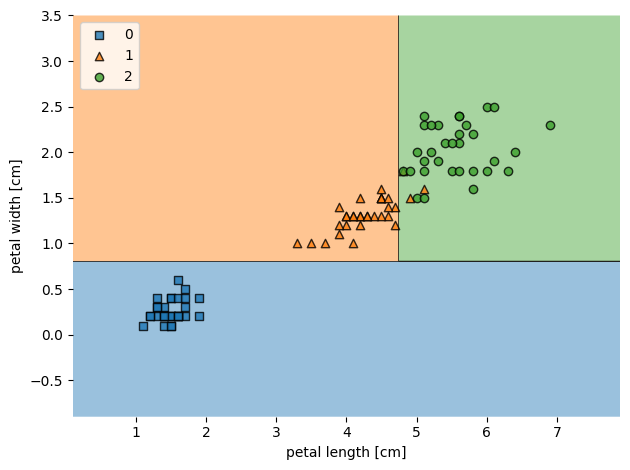

In [ ]:
plot_decision_regions(X_train, y_train, tree_clf)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)
Create DataFrame from raw data:

In [ ]:
import pandas as pd

# np.c_ is the numpy concatenate function
iris_df = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                      columns= iris_data['feature_names'] + ['target'])

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


The columns shows the length, width but does not show the group to which this length or width belongs. The group to which these values belong is stored in target_names which can stored in seperate column in our dataframe as.



In [ ]:
group_names = pd.Series([iris_data.target_names[ind] for ind in iris_data.target], dtype = 'category')

iris_df['group'] = group_names


iris_df.head()


Visualizing:

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.boxplot(x="group",y="petal length (cm)",data=iris_df)

plt.show()

In [ ]:
# View the relationships between variables; color code by species type
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

before= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('Pair Plot of the dataset without normalization', y=1.08)

In [ ]:
from sklearn import tree

text_representation = tree.export_text(tree_clf)
print(text_representation)


In [ ]:
from sklearn.tree import plot_tree


plt.figure(figsize=(10, 7))

plot_tree(tree_clf, 
          filled=True, 
          rounded=True,
          class_names=['Setosa', 'Versicolor', 'Virginica'],
          feature_names=['petal length', 'petal width']) 

plt.show()

In [ ]:
! pip install graphviz dtreeviz

In [ ]:
import dtreeviz  # remember to load the package

viz_model = dtreeviz.model(tree_clf, X, y,
                target_name="target",
                feature_names=iris_data.feature_names,
                class_names=list(iris_data.target_names))

viz_model.view()     # render as SVG into internal object 

In [ ]:
! pip uninstall -y matplotlib
! pip install matplotlib

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import font_manager as fm, pyplot as plt

!wget https://github.com/matomo-org/travis-scripts/blob/master/fonts/Arial.ttf 

font_files = fm.findSystemFonts()

# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)


t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2*np.pi*t)

plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.show()

Exemplary decission tree based on Iris dataset:

<img src="https://drive.google.com/uc?export=view&id=1OjOwlUJan12OARb0j0Qr2RoAM_zuJ6ka" width=400 alt="img"/>


---- 
# Assigment:
Implement `DecisionTree` class that can be used in below script for training:

<img src="https://drive.google.com/uc?export=view&id=1e_TdQOIMqyvywpOqmgWDwDkMp4EJ7niZ" width=500 alt="img"/>

Use ONLY Python + NumPy library to fill the following template of the class:

<img src="https://drive.google.com/uc?export=view&id=1Fesja1OaqwIkl6wRbO255qNhDyr5xize" width=600 alt="img"/>



# My implementation DecisionTree

In [27]:
"""
Completed DecisionTree
"""

import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None
    
    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(self.n_features, X.shape[1])
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
    
        # Pierwszy warunek stopu: drzewo osiągnęło maksymalną głębokość lub nie można podzielić węzła
        if depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_features, replace=False)
        best_feat, best_thresh, (left_idxs, right_idxs) = self._best_split(X, y, feat_idxs)

        # Drugi warunek stopu: nie można znaleźć najlepszego podziału
        if left_idxs.sum() == 0 or right_idxs.sum() == 0:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        left = self._grow_tree(X[left_idxs], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs], y[right_idxs], depth + 1)
        
        return Node(best_feat, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -np.inf
        split_idx, split_thresh = None, None
        for i in feat_idxs:
            vals = X[:, i]
            for threshold in np.unique(vals):
                gain = self._information_gain(y, vals, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = i
                    split_thresh = threshold
        left_idxs = X[:, split_idx] <= split_thresh
        right_idxs = X[:, split_idx] > split_thresh
        
        return split_idx, split_thresh, (left_idxs, right_idxs)

    def _information_gain(self, y, X_column, threshold):
        # Obliczanie entropii rodzica
        parent_entropy = self._entropy(y)

        # Podział danych na podstawie wartości progowej
        left_idxs = X_column <= threshold
        right_idxs = X_column > threshold
        left_y, right_y = y[left_idxs], y[right_idxs]

        # Obliczanie entropii dzieci
        left_entropy = self._entropy(left_y)
        right_entropy = self._entropy(right_y)

        # Obliczanie wartości zysku z informacji
        n = len(y)
        n_l, n_r = len(left_y), len(right_y)
        child_entropy = (n_l/n) * left_entropy + (n_r/n) * right_entropy
        information_gain = parent_entropy - child_entropy

        return information_gain

    def _split(self, X_column, split_thresh):
        left_indices = np.where(X_column <= split_thresh)[0]
        right_indices = np.where(X_column > split_thresh)[0]
        
        return left_indices, right_indices

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])

    def _traverse_tree(self, x, node):
        node = self.root
        while not node.is_leaf_node():
            if x[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

    def _most_common_label(self, y):
        labels, counts = np.unique(y, return_counts=True)
        return labels[np.argmax(counts)]

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

In [29]:
"""
Training
"""

from sklearn import datasets
from sklearn.model_selection import train_test_split
# from decision_tree import DecisionTree
import numpy as np

data = datasets.load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

clf = DecisionTree(max_depth=10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(Y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

acc = accuracy(y_test, predictions)
print(acc)

1.0
